<p style ="color: #d90429;
                    font-size:50px; 
                    font-style:bold;
                    text-decoration: underline;
                    text-align: center ">
    Thyroid Disease Detection
</p>


<center><img src ='https://nci-media.cancer.gov/pdq/media/images/719086-571.jpg' ></center>

<h2 style ="color: #fb8500;font-size:35px; font-style:bold; text-decoration: underline;"> Step 1: Acquire </h2>

### Step 1.a: Explore Problem
    
##### Problem is to detect Thyroid Disease.<br>

   
### Step 1.b: Indentify Data

##### Thyroid Disease dataset are availble in <a href = 'https://archive.ics.uci.edu/ml/machine-learning-databases/thyroid-disease/'>uci</a> website .
 

### Step 1.c: About Data 

    [Thyroid disease records supplied by the Garavan Institute and J. Ross
    Quinlan, New South Wales Institute, Syndney, Australia.1987.]
    

    classes: increased binding protein, decreased binding protein,negative.			

    age:                                                       continuous.
    sex:				                                       M, F.
    on thyroxine:			                                   f, t.
    query on thyroxine:		                                   f, t.
    on antithyroid medication:	                               f, t.
    sick:				                                       f, t.
    pregnant:			                                       f, t.
    thyroid surgery:		                                   f, t.
    I131 treatment:			                                   f, t.
    query hypothyroid:		                                   f, t.
    query hyperthyroid:		                                   f, t.
    lithium:			                                       f, t.
    goitre:				                                       f, t.
    tumor:				                                       f, t.
    hypopituitary:			                                   f, t.
    psych:				                                       f, t.
    TSH measured:			                                   f, t.
    TSH:(Thyroid stimulating hormone)				             continuous.
    T3 measured:			                                     f, t.
    T3:				                                             continuous.
    TT4 measured:			                                      f, t.
    TT4:				                                         continuous.
    T4U measured:			                                      f, t.
    T4U:(Thyroxine utilization rate)				             continuous.
    FTI measured:			                                      f, t.
    FTI:				                                         continuous.
    TBG measured:			                                     f, t.
    TBG:				                                         continuous.
    referral source:		                                     WEST, STMW, SVHC, SVI, SVHD, other.

    
 `Thyroid-binding globulin (TBG) is produced in the liver and is a circulating protein that reversibly binds to thyroid hormones 3,5,3’-triiodothyronine (T3) and thyroxine (T4) and carries them in the bloodstream.`
 
 
         `FTI(Free Thyroxine Index) = Thyroxine (T4) / Thyroid binding capacity.`
         `T4U = Thyroxine utilization rate`
         `TSH = Thyroid stimulating hormone`
         `TT4 = Total Thyroxine` 
         `TT3 = Total Triiodothyronine`
         `T4 = Thyroxine` 
         `T3 = Triiodothyronine`
         `f = False (0)`
         `t = True(1)`
         `M = Male`
         `F = Female`
         
<center><img src='https://i.pinimg.com/originals/a3/c9/dd/a3c9ddf24b0f6ae66c49571f15c305a0.jpg'></center>       
 

<h5 style ="color: #fb8500;font-size:35px; font-style:bold; text-decoration: underline;"> About Thyroid Classes </h5>
 
 * `Increased binding protein` - `Hypothyroidism`
     
         Increased TBG levels may be due to hypothyroidism, liver disease, and pregnancy. In cases of high TBG, more thyroid hormone will be bound, decreasing free hormone in the blood.
 
 * `Decreased binding protein` - `Hyperthyroidism`
 
         Decreased TBG levels may also be due to hyperthyroidism, renal disease, liver disease, severe systemic illness, Cushing syndrome, medications, and malnutrition. If TBG levels are low, total thyroid levels will be low and free thyroid hormone levels may be normal or low.
     
 * `Negative - No Thyroid`
 
<h5 style ="color: #fb8500;font-size:35px; font-style:bold; text-decoration: underline;"> Thyroid Symptoms </h5>
<img src ='https://www.verywellhealth.com/thmb/XBdgIUhlNw6AmO55fwqyP5joQ28=/1500x1000/filters:no_upscale():max_bytes(150000):strip_icc()/Hypothyroidism-hyperthyroidism-5180646_final-82b76c2edd074f59aa005f72ba2a3994.jpg'>


### Step 1.d: Import Libary 


In [29]:
import pandas as pd
pd.set_option('display.max_columns',None)
import warnings
warnings.filterwarnings('ignore')

In [142]:
name_path = r'Data/allbp_names.csv'
data_path = r'Data/allbp_data.csv'
test_path = r'Data/allbp_test.csv'

In [143]:
name_df = pd.read_csv(name_path,skiprows=9,on_bad_lines='skip')
name_df.head()

,age:\t\t\t\tcontinuous.,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
0,age:\t\t\t\tcontinuous.,NaN,NaN,NaN,NaN,NaN
1,sex:\t\t\t\tM,F.,NaN,NaN,NaN,NaN
2,on thyroxine:\t\t\tf,t.,NaN,NaN,NaN,NaN
3,query on thyroxine:\t\tf,t.,NaN,NaN,NaN,NaN
4,on antithyroid medication:\tf,t.,NaN,NaN,NaN,NaN


In [144]:
name_df.dropna(axis=1,how='any',inplace=True)

In [145]:
name_df.head(2)

,age:\t\t\t\tcontinuous.
0,age:\t\t\t\tcontinuous.
1,sex:\t\t\t\tM


In [146]:
name_df.rename(columns={"age:\t\t\t\tcontinuous.":"Name"},inplace=True)

In [147]:
name_df.head(2)

,Name
0,age:\t\t\t\tcontinuous.
1,sex:\t\t\t\tM


In [148]:
Column_name =[i[0] for i in name_df['Name'].str.split(':')]
              

In [149]:
Column_name.append('Classes')


In [150]:
len(Column_name)

30

In [151]:
data_df = pd.read_csv(data_path,names=Column_name)
data_df.head()

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,query hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,TSH measured,TSH,T3 measured,T3,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured,TBG,referral source,Classes
0,41,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,1.3,t,2.5,t,125,t,1.14,t,109,f,?,SVHC,negative.|3733
1,23,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,4.1,t,2,t,102,f,?,f,?,f,?,other,negative.|1442
2,46,M,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,0.98,f,?,t,109,t,0.91,t,120,f,?,other,negative.|2965
3,70,F,t,f,f,f,f,f,f,f,f,f,f,f,f,f,t,0.16,t,1.9,t,175,f,?,f,?,f,?,other,negative.|806
4,70,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,0.72,t,1.2,t,61,t,0.87,t,70,f,?,SVI,negative.|2807


In [152]:
data_df.shape

(2800, 30)

In [153]:
test_df = pd.read_csv(test_path,names=Column_name,index_col=False)
test_df.head()

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,query hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,TSH measured,TSH,T3 measured,T3,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured,TBG,referral source,Classes
0,35,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,?,f,?,f,?,f,?,f,?,f,?,other,negative.|219
1,63,M,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,3.5,t,2.5,t,108,t,0.96,t,113,f,?,SVI,negative.|2059
2,25,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,4.6,t,2.4,t,61,t,0.82,t,75,f,?,SVHD,negative.|399
3,53,F,f,f,f,f,f,f,f,t,f,f,f,f,f,f,t,0.25,t,2.1,t,145,t,1.03,t,141,f,?,other,negative.|1911
4,92,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,0.7,t,1.3,t,120,t,0.84,t,143,f,?,SVI,negative.|487


In [154]:
test_df.shape

(972, 30)

In [155]:
data = pd.concat([data_df,test_df],ignore_index=True)

In [156]:
data

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,query hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,TSH measured,TSH,T3 measured,T3,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured,TBG,referral source,Classes
0,41,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,1.3,t,2.5,t,125,t,1.14,t,109,f,?,SVHC,negative.|3733
1,23,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,4.1,t,2,t,102,f,?,f,?,f,?,other,negative.|1442
2,46,M,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,0.98,f,?,t,109,t,0.91,t,120,f,?,other,negative.|2965
3,70,F,t,f,f,f,f,f,f,f,f,f,f,f,f,f,t,0.16,t,1.9,t,175,f,?,f,?,f,?,other,negative.|806
4,70,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,0.72,t,1.2,t,61,t,0.87,t,70,f,?,SVI,negative.|2807
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3767,30,F,f,f,f,f,f,f,f,f,f,f,f,t,f,f,f,?,f,?,f,?,f,?,f,?,f,?,other,negative.|2924
3768,68,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,1,t,2.1,t,124,t,1.08,t,114,f,?,SVI,negative.|974
3769,74,F,f,f,f,f,f,f,f,f,t,f,f,f,f,f,t,5.1,t,1.8,t,112,t,1.07,t,105,f,?,other,negative.|1493
3770,72,M,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,0.7,t,2,t,82,t,0.94,t,87,f,?,SVI,negative.|252


# EDA

In [157]:
data_copy = data.copy(deep=True)

In [158]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3772 entries, 0 to 3771
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   age                        3772 non-null   object
 1   sex                        3772 non-null   object
 2   on thyroxine               3772 non-null   object
 3   query on thyroxine         3772 non-null   object
 4   on antithyroid medication  3772 non-null   object
 5   sick                       3772 non-null   object
 6   pregnant                   3772 non-null   object
 7   thyroid surgery            3772 non-null   object
 8   I131 treatment             3772 non-null   object
 9   query hypothyroid          3772 non-null   object
 10  query hyperthyroid         3772 non-null   object
 11  lithium                    3772 non-null   object
 12  goitre                     3772 non-null   object
 13  tumor                      3772 non-null   object
 14  hypopitu

In [159]:
data.describe()

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,query hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,TSH measured,TSH,T3 measured,T3,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured,TBG,referral source,Classes
count,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772
unique,175,3,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,288,2,70,2,242,2,147,2,235,1,1,5,3772
top,59,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,?,t,?,t,?,t,?,t,?,f,?,other,negative.|3733
freq,75,2480,3308,3722,3729,3625,3719,3719,3713,3538,3535,3754,3738,3676,3771,3588,3403,369,3003,769,3541,231,3385,387,3387,385,3772,3772,2201,1


In [160]:
data.isna().sum()

age                          0
sex                          0
on thyroxine                 0
query on thyroxine           0
on antithyroid medication    0
sick                         0
pregnant                     0
thyroid surgery              0
I131 treatment               0
query hypothyroid            0
query hyperthyroid           0
lithium                      0
goitre                       0
tumor                        0
hypopituitary                0
psych                        0
TSH measured                 0
TSH                          0
T3 measured                  0
T3                           0
TT4 measured                 0
TT4                          0
T4U measured                 0
T4U                          0
FTI measured                 0
FTI                          0
TBG measured                 0
TBG                          0
referral source              0
Classes                      0
dtype: int64

# Feature  Engineering

In [161]:
data['Classes'] = data['Classes'].apply(lambda x : x[:x.find(".")])

In [162]:
data['Classes'].value_counts()

negative                     3609
increased binding protein     149
decreased binding protein      14
Name: Classes, dtype: int64

In [164]:
data['Class'] = data['Classes'].copy()

In [165]:
data.drop(columns='referral source',inplace=True)

In [166]:
data.columns

Index(['age', 'sex', 'on thyroxine', 'query on thyroxine',
       'on antithyroid medication', 'sick', 'pregnant', 'thyroid surgery',
       'I131 treatment', 'query hypothyroid', 'query hyperthyroid', 'lithium',
       'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH measured', 'TSH',
       'T3 measured', 'T3', 'TT4 measured', 'TT4', 'T4U measured', 'T4U',
       'FTI measured', 'FTI', 'TBG measured', 'TBG', 'Classes', 'Class'],
      dtype='object')

In [167]:
data = data.apply(lambda x : x.replace('?','0'))

In [171]:
data.head()

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,query hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,TSH measured,TSH,T3 measured,T3,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured,TBG,Classes,Class
0,41,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,1.3,t,2.5,t,125,t,1.14,t,109,f,0,negative,negative
1,23,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,4.1,t,2,t,102,f,0,f,0,f,0,negative,negative
2,46,M,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,0.98,f,0,t,109,t,0.91,t,120,f,0,negative,negative
3,70,F,t,f,f,f,f,f,f,f,f,f,f,f,f,f,t,0.16,t,1.9,t,175,f,0,f,0,f,0,negative,negative
4,70,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,0.72,t,1.2,t,61,t,0.87,t,70,f,0,negative,negative


In [176]:
data['Class'].value_counts()

negative                     3609
increased binding protein     149
decreased binding protein      14
Name: Class, dtype: int64

In [177]:
data['Class']= data['Class'].map({'negative':'Negative','increased binding protein':'Hypothyroidism','decreased binding protein':'Hyperthyroidism'})

In [178]:
data['Class'].value_counts()

Negative           3609
Hypothyroidism      149
Hyperthyroidism      14
Name: Class, dtype: int64

In [185]:
num_col = ['age','TSH','T3','TT4','T4U','FTI','TBG']
len(num_col)

7

In [186]:
cat_col = [col for col in data.columns if col not in num_col]
len(cat_col)

23

In [189]:

data[num_col].head()

,age,TSH,T3,TT4,T4U,FTI,TBG
0,41,1.3,2.5,125,1.14,109,0
1,23,4.1,2,102,0,0,0
2,46,0.98,0,109,0.91,120,0
3,70,0.16,1.9,175,0,0,0
4,70,0.72,1.2,61,0.87,70,0


In [193]:
data[num_col].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3772 entries, 0 to 3771
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   age     3772 non-null   object
 1   TSH     3772 non-null   object
 2   T3      3772 non-null   object
 3   TT4     3772 non-null   object
 4   T4U     3772 non-null   object
 5   FTI     3772 non-null   object
 6   TBG     3772 non-null   object
dtypes: object(7)
memory usage: 206.4+ KB


In [200]:
# change datatype
data[num_col]=data[num_col].astype('float64')
data[['age']]=data[['age']].astype('int64')

In [204]:
data.dtypes

age                            int64
sex                           object
on thyroxine                  object
query on thyroxine            object
on antithyroid medication     object
sick                          object
pregnant                      object
thyroid surgery               object
I131 treatment                object
query hypothyroid             object
query hyperthyroid            object
lithium                       object
goitre                        object
tumor                         object
hypopituitary                 object
psych                         object
TSH measured                  object
TSH                          float64
T3 measured                   object
T3                           float64
TT4 measured                  object
TT4                          float64
T4U measured                  object
T4U                          float64
FTI measured                  object
FTI                          float64
TBG measured                  object
T

In [174]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit_transform(data[['sick']])

array([0, 0, 0, ..., 0, 0, 0])

In [169]:
import matplotlib.pyplot as plt
import seaborn as sns

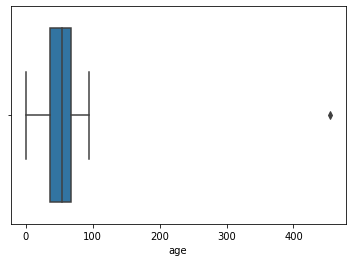

In [217]:


sns.boxplot(data['age']);
# sns.kdeplot(data['age']);

In [213]:
data['age'].describe()

count    3772.000000
mean       51.722163
std        20.099955
min         0.000000
25%        36.000000
50%        54.000000
75%        67.000000
max       455.000000
Name: age, dtype: float64

In [214]:
data.describe()

,age,TSH,T3,TT4,T4U,FTI,TBG
count,3772.000000,3772.000000,3772.000000,3772.000000,3772.000000,3772.000000,3772.0
mean,51.722163,4.589148,1.603006,101.685790,0.892915,99.194247,0.0
std,20.099955,23.339839,1.096918,43.182478,0.354204,45.846407,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,36.000000,0.200000,0.900000,84.000000,0.840000,86.750000,0.0
50%,54.000000,1.200000,1.800000,102.000000,0.950000,104.000000,0.0
75%,67.000000,2.425000,2.200000,123.000000,1.070000,121.250000,0.0
max,455.000000,530.000000,10.600000,430.000000,2.320000,395.000000,0.0
